In [1]:
#the comparasion and analysis in the predicted values and actual values in the 2018

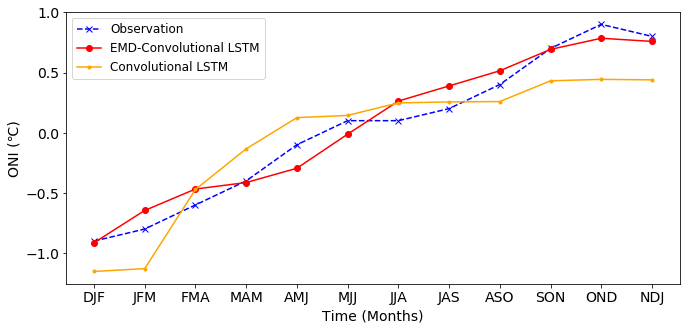

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

normalized_lstms=np.array([-1.15227413,-1.12899268,-0.47112679,-0.13396825,0.12515147,0.1437145,0.247545,0.25556532,0.25881884,0.43107274,0.44317427,0.43884516])
predicted_values=np.array([-0.9138631,-0.64577143,-0.46778013,-0.41380659,-0.29520753,-0.01224175,0.26282753,0.38837113,0.51434888,0.69200458,0.78456772,0.7583482])
round_true_values=np.array([-0.9,-0.8,-0.6,-0.4,-0.1,0.1,0.1,0.2,0.4,0.7,0.9,0.8])

plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
plt.plot(index_start,round_true_values.reshape(-1),color="blue",marker="x",linestyle='--',label='Observation')
plt.plot(index_start,predicted_values.reshape(-1),color="red",marker="o",label='EMD-Convolutional LSTM')
plt.plot(index_start,normalized_lstms.reshape(-1),color="orange",marker=".",linestyle='-',label='Convolutional LSTM')

plt.tick_params(labelsize=14)


plt.xlabel('Time (Months)',fontsize=14,color="black")
plt.ylabel('ONI (℃)',fontsize=14,color="black")

plt.legend(loc=2,fontsize=12) 

plt.show() 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

predicted_values=np.array([-0.9138631,-0.64577143,-0.46778013,-0.41380659,-0.29520753,-0.01224175,0.26282753,0.38837113,0.51434888,0.69200458,0.78456772,0.7583482])
round_true_values=np.array([-0.9,-0.8,-0.6,-0.4,-0.1,0.1,0.1,0.2,0.4,0.7,0.9,0.8])

Vanilla=np.array([-1.0408145,-1.07535334,-0.98482301,-0.80281866,-0.53417867,-0.1474927,0.13194565,0.40956372,0.71577343,1.01474834,1.15028367,1.14999637])
three_lstm=np.array([-1.11888187,-1.095304,-0.92777621,-0.74347492,-0.44386457,-0.06634667,0.21230185,0.51790275,0.61599514,0.76501111,0.66495242,0.58794989])
encoder_decoder_lstm= np.array([-0.94194796,-0.90984478,-0.8420199,-0.64871859,-0.36965526,-0.03531501,0.30228831,0.58196489,0.77709884,0.87566058,0.84812427,0.67342955])
#ConvLSTM_lstm= np.array([-0.66652805,-0.46386946,-0.32610092,-0.22423155,-0.10468332,0.04458661,0.22035713,0.41214355,0.59717871,0.74597514,0.83644341,0.86378983])


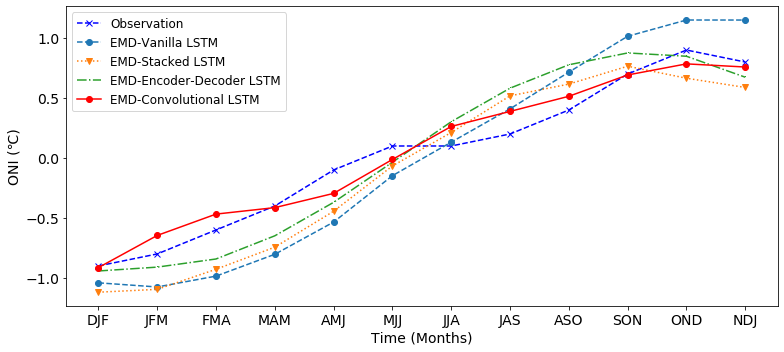

In [5]:
plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

plt.plot(index_start,round_true_values.reshape(-1),color="blue",marker="x",linestyle='--',label='Observation')
plt.plot(index_start,Vanilla.reshape(-1),marker="o",linestyle='--',label='EMD-Vanilla LSTM')
plt.plot(index_start,three_lstm.reshape(-1),marker="v",linestyle=':',label='EMD-Stacked LSTM')
plt.plot(index_start,encoder_decoder_lstm.reshape(-1),marker=",",linestyle='-.',label='EMD-Encoder-Decoder LSTM')
plt.plot(index_start,predicted_values.reshape(-1),color="red",marker="o",label='EMD-Convolutional LSTM')

plt.tick_params(labelsize=14)

plt.xlabel('Time (Months)',fontsize=14,color="black")
plt.ylabel('ONI (℃)',fontsize=14,color="black")

plt.legend(loc=2,fontsize=12) 
plt.tight_layout()
plt.show() 

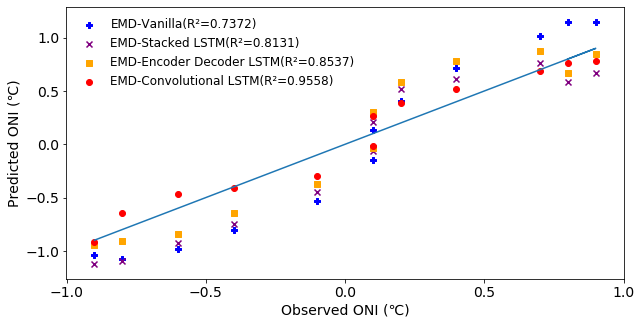

In [6]:
plt.figure(figsize=(10,5))
index_start = np.array(range(1,13))
#plt.text(-0.9,0.7,r'R²=0.8139',fontsize=16)

plt.plot(round_true_values.reshape(-1),round_true_values.reshape(-1))
plt.scatter(round_true_values.reshape(-1),Vanilla.reshape(-1),marker="P",color="blue",label='EMD-Vanilla(R²=0.7372)')
plt.scatter(round_true_values.reshape(-1),three_lstm.reshape(-1),marker="x",color="purple",label='EMD-Stacked LSTM(R²=0.8131)')
plt.scatter(round_true_values.reshape(-1),encoder_decoder_lstm.reshape(-1),marker="s",color="orange",label='EMD-Encoder Decoder LSTM(R²=0.8537)')
plt.scatter(round_true_values.reshape(-1),predicted_values.reshape(-1),marker="o",color="red",label='EMD-Convolutional LSTM(R²=0.9558)')


plt.xlabel('Observed ONI (℃)',fontsize=14,color="black")
plt.ylabel('Predicted ONI (℃)',fontsize=14,color="black")

plt.legend(loc=2,fontsize=12,frameon=False) 
 
#for a, b in zip(round_true_values.reshape(-1), normalized_lstms):  
   # plt.text(a, np.round(b,4), (a,np.round(b,4)),ha='center', va='bottom', fontsize=10)  
 
plt.tick_params(labelsize=14)
plt.yticks([-1,-0.5,0.0,0.5,1.0])
plt.xticks([-1,-0.5,0.0,0.5,1.0])

plt.show() 

In [7]:
from sklearn import metrics
compare_a=[]
compare_b=[]
compare_c=[]
compare_d=[]
compare_e=[]
mae_12_every=[]
mae_12_every_v=[]
mae_12_every_s=[]
mae_12_every_e=[]
for i in range(len(round_true_values)):
     a_window=round_true_values[i]
     b_window=predicted_values[i]
     c_window=Vanilla[i]
     d_window=three_lstm[i]        
     e_window=encoder_decoder_lstm[i]       
     
     compare_a.append(a_window)
     compare_b.append(b_window)
     compare_c.append(c_window)
     compare_d.append(d_window)
     compare_e.append(e_window)
        
     mae_12=metrics.mean_absolute_error(compare_a,compare_b)
     mae_12_every.append(mae_12)
    
     mae_12_v=metrics.mean_absolute_error(compare_a,compare_c)
     mae_12_every_v.append(mae_12_v)
    
     mae_12_s=metrics.mean_absolute_error(compare_a,compare_d)
     mae_12_every_s.append(mae_12_s)
     
     mae_12_e=metrics.mean_absolute_error(compare_a,compare_e)
     mae_12_every_e.append(mae_12_e)
    
     #print ("The Mean Absolute Errors between actual values and predicted values in 12 months is:{0}".format(np.round(mae_12,4)))
     print ("The Mean Absolute Errors between actual values and predicted values in 12 months is:{0}".format(np.round(mae_12_v,4)))

The Mean Absolute Errors between actual values and predicted values in 12 months is:0.1408
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2081
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.267
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.301
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.3276
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.3142
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2739
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2659
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2714
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2758
The Mean Absolute Errors between actual values and predicted values in 12 months is:0.2734
T

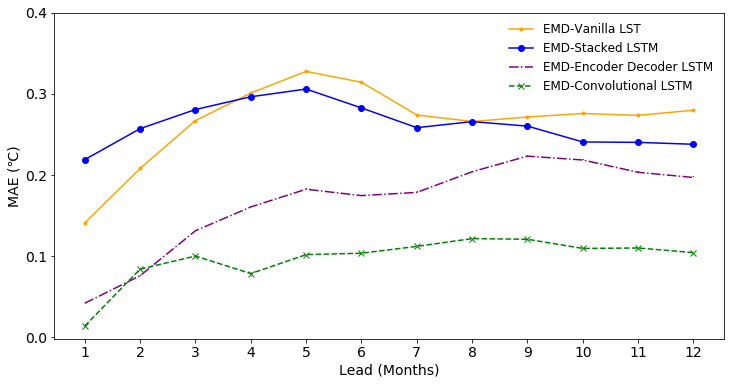

In [8]:
plt.figure(figsize=(12,6))
index_start = np.array(range(1,13))
#index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"," DJF "," JFM "]
#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
plt.plot(index_start,mae_12_every_v,color="orange",marker=".",linestyle='-',label='EMD-Vanilla LST')
plt.plot(index_start,mae_12_every_s,color="b",marker="o",linestyle='-',label='EMD-Stacked LSTM')
plt.plot(index_start,mae_12_every_e,color="purple",marker=",",linestyle='-.',label='EMD-Encoder Decoder LSTM')
plt.plot(index_start,mae_12_every,color="g",marker="x",linestyle='--',label='EMD-Convolutional LSTM')

plt.xlabel('Lead (Months)',fontsize=14,color="black")
plt.ylabel('MAE (℃)',fontsize=14,color="black")

plt.legend(loc=1,fontsize=12,frameon=False) 
plt.tick_params(labelsize=14)

plt.xticks(index_start)
plt.yticks([0.0,0.1,0.2,0.3,0.4])

plt.show() 

In [9]:
from sklearn import metrics
compare_a=[]
compare_b=[]
compare_c=[]
compare_d=[]
compare_e=[]
rmae_12_every=[]
rmae_12_every_v=[]
rmae_12_every_s=[]
rmae_12_every_e=[]
for i in range(len(round_true_values)):
     a_window=round_true_values[i]
     b_window=predicted_values[i]
     c_window=Vanilla[i]
     d_window=three_lstm[i]        
     e_window=encoder_decoder_lstm[i]       
     
     compare_a.append(a_window)
     compare_b.append(b_window)
     compare_c.append(c_window)
     compare_d.append(d_window)
     compare_e.append(e_window)
        
     rmae_12=np.sqrt(metrics.mean_squared_error(compare_a,compare_b))  
     rmae_12_every.append(rmae_12)
    
     rmae_12_v=np.sqrt(metrics.mean_squared_error(compare_a,compare_c)) 
     rmae_12_every_v.append(rmae_12_v)
    
     rmae_12_s=np.sqrt(metrics.mean_squared_error(compare_a,compare_d)) 
     rmae_12_every_s.append(rmae_12_s)
     
     rmae_12_e=np.sqrt(metrics.mean_squared_error(compare_a,compare_e)) 
     rmae_12_every_e.append(rmae_12_e)
    
     #print ("The Mean Absolute Errors between actual values and predicted values in 12 months is:{0}".format(np.round(mae_12,4)))
     print ("The Mean Absolute Errors between actual values and predicted values in 12 months is:{0}".format(np.round(rmae_12_every,4)))

The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176 0.102 ]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176 0.102  0.1263]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176 0.102  0.1263 0.1241]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176 0.102  0.1263 0.1241 0.1303]
The Mean Absolute Errors between actual values and predicted values in 12 months is:[0.0139 0.1095 0.1176 0.102  0.1263 0.1241 0.1303 0.1389]
The Mean Absolute Errors between actual values and predicted

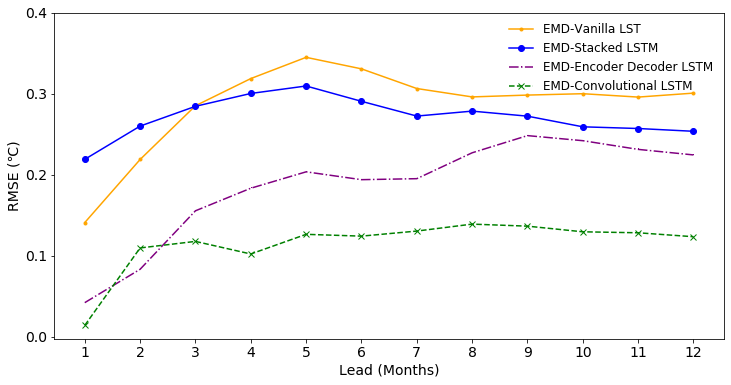

In [11]:
plt.figure(figsize=(12,6))
index_start = np.array(range(1,13))
#index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"," DJF "," JFM "]
#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)

plt.plot(index_start,rmae_12_every_v,color="orange",marker=".",linestyle='-',label='EMD-Vanilla LST')
plt.plot(index_start,rmae_12_every_s,color="b",marker="o",linestyle='-',label='EMD-Stacked LSTM')
plt.plot(index_start,rmae_12_every_e,color="purple",marker=",",linestyle='-.',label='EMD-Encoder Decoder LSTM')
plt.plot(index_start,rmae_12_every,color="g",marker="x",linestyle='--',label='EMD-Convolutional LSTM')

plt.xlabel('Lead (Months)',fontsize=14,color="black")
plt.ylabel('RMSE (℃)',fontsize=14,color="black")

plt.legend(loc=1,fontsize=12,frameon=False) 
plt.tick_params(labelsize=14)
plt.xticks(index_start)
plt.yticks([0.0,0.1,0.2,0.3,0.4])

plt.show() 